<center>Universidade Estadual Paulista - UNESP</center>
<center>Faculdade de Engenharia de Ilha Solteira - FEIS</center>
<center>Departamento de Engenharia Mecânica - DEM</center>
<center>Programa de Pós-Graduação em Engenharia Mecânica - PPGEM</center>
<br>
<center><b>Disciplina: Dinâmica dos Sistemas Mecânicos</b></center>
<center><b>Trabalho Computacional - Pião Simétrico com Ponto Fixo</b></center>
<br>
<center><b>Docente: <a href="https://www.samueldasilva.org/">Samuel da Silva</a></b></center>
<center><b>Discente: <a href="https://www.taggo.com/estevaofuzaro">Estevão Fuzaro de Almeida</a></b></center>

---

A Figura abaixo representa um pião simétrico com massa $m$ que está fixo em $O$. Para se parametrizar o movimento do pião no espaço, deve-se fazer uma sequência de três rotações consecutivas em torno de três eixos diferentes, utilizando os ângulos de Euler.
- Primeiramente, toma-se como referência inercial, $\mathscr{I}$, o eixo $(X,Y,Z)$ e $\{\hat{i}, \hat{j}, \hat{k}\}$ fixo em $O$.
- A primeira rotação é em torno do eixo $Z \equiv z_1$ com velocidade angular $\dot{\psi}$ com um ângulo de precessão no sistema móvel $\mathscr{B}_1$ com $(x_1, y_1, z_1)$ e $\{\hat{i}_1, \hat{j}_1, \hat{k}_1\}$.
- O segundo giro é feito em torno de $x_1 \equiv x_2$ no sentido positivo, com velocidade angular $\dot{\theta}$ e com um ângulo de nutação $\theta$ no sistema móvel $\mathscr{B}_2$ com $(x_2, y_2, z_2)$ e $\{\hat{i}_2, \hat{j}_2, \hat{k}_2\}$.
- Por fim, é feita a última rotação em torno de $z_2 \equiv z$ com uma velocidade angular $\dot{\phi}$ e um ângulo de *spin* $\phi$ no sistema móvel $\mathscr{B}_3$ com $(x, y, z)$ e $\{\hat{i}_3, \hat{j}_3, \hat{k}_3\}$.
- O centro de massa do pião é representado pelo ponto $A$ e a distância do ponto $O$ até este ponto ao longo do eixo $z$ é $l$.

<p align="center">
  <img src="imgs/piao.png" alt="drawing" width="350" align="center"/>
</p>
<p align="center">
  Fig. 1 - Pião simétrico com ponto fixo.
</p>

- O tensor de inércia $\mathbb{I}_A$ do pião de massa $m$ calculado com relação aos eixos principais $x_2$, $y_2$ e $z_2$, dado por:
$$\mathbb{I}_A = \begin{bmatrix} I_{x_2} & 0 & 0\\ 0 & I_{y_2} & 0 \\ 0 & 0 & I_{z_2}\end{bmatrix}$$
sendo $I_{x_2}$ , $I_{y_2}$ e $I_{z_2}$ componentes do tensor de inércia com relação aos eixos $x_2$, $y_2$ e $z_2$, respectivamente. Considerando que o pião é simétrico, então $I_{x_2} \equiv I_{y_2} = I$, com isso:
$$\mathbb{I}_A = \begin{bmatrix} I & 0 & 0\\ 0 & I & 0 \\ 0 & 0 & I_{z_2}\end{bmatrix}$$

In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
from scipy.io import savemat

Faça um relatório descritivo com um *script* contendo as informações:

---

##### **1. Obtenha as matrizes de rotação entre os sistemas inercial e móveis usados.**

In [2]:
# Definindo as variáveis do problema
t, l, m, g = smp.symbols('t, l, m, g', real=True) # Tempo "t", Comprimento "l", Massa "m" e Gravidade "g"
theta, psi, phi = smp.symbols(r'\theta \psi \phi', cls=smp.Function) # Theta, Phi e Psi
Ixx, Iyy, Izz, Ixy, Iyz, Ixz, I, Iz2 = smp.symbols('I_{xx}, I_{yy}, I_{zz}, I_{xy}, I_{yz}, I_{xz}, I, I_{z_2}', real=True) # Inércias
Rx, Ry, Rz, Mz = smp.symbols('R_x, R_y, R_z, M_z', real=True) # Reações

# Ângulos
theta = theta(t)
psi = psi(t)
phi = phi(t)

# Velocidades angulares
theta_d = smp.diff(theta,t)
psi_d = smp.diff(psi,t)
phi_d = smp.diff(phi,t)

# Acelerações angulares
theta_dd = smp.diff(theta_d,t)
psi_dd = smp.diff(psi_d,t)
phi_dd = smp.diff(phi_d,t)

- **Matriz de Transformação $T_{\psi}$ da Base Inercial $\mathscr{I}$ para a Base Móvel $\mathscr{B}_1$**

$$_{\mathscr{B}_1} S = T_{\psi}\left({_{\mathscr{I}}} S\right)$$

In [3]:
T_psi = smp.Matrix([[smp.cos(psi),smp.sin(psi),0],
                    [-smp.sin(psi),smp.cos(psi),0],
                    [0,0,1]])
T_i1 = T_psi
T_i1.simplify()
T_i1

Matrix([
[ cos(\psi(t)), sin(\psi(t)), 0],
[-sin(\psi(t)), cos(\psi(t)), 0],
[            0,            0, 1]])

- **Matriz de Transformação $T_{\theta}$ da Base Móvel $\mathscr{B}_1$ para a Base Móvel $\mathscr{B}_2$**

$$_{\mathscr{B}_2} S = T_{\theta}\left({_{\mathscr{B}_1}} S\right)$$

In [4]:
T_theta = smp.Matrix([[1,0,0],
                      [0,smp.cos(theta),smp.sin(theta)],
                      [0,-smp.sin(theta),smp.cos(theta)]])
T_12 = T_theta
T_12.simplify()
T_12

Matrix([
[1,               0,              0],
[0,  cos(\theta(t)), sin(\theta(t))],
[0, -sin(\theta(t)), cos(\theta(t))]])

- **Matriz de Transformação $T_{\phi}$ da Base Móvel $\mathscr{B}_2$ para a Base Móvel $\mathscr{B}_3$**

$$_{\mathscr{B}_3} S = T_{\phi}\left({_{\mathscr{B}_2}} S\right)$$

In [5]:
T_phi = smp.Matrix([[smp.cos(phi),smp.sin(phi),0],
                    [-smp.sin(phi),smp.cos(phi),0],
                    [0,0,1]])
T_23 = T_phi
T_23.simplify()
T_23

Matrix([
[ cos(\phi(t)), sin(\phi(t)), 0],
[-sin(\phi(t)), cos(\phi(t)), 0],
[            0,            0, 1]])

- **Transformação da Base Inercial $\mathscr{I}$ para a Base Móvel $\mathscr{B}_2$**

$$_{\mathscr{B}_2} S = T_{\theta}T_{\psi}\left({_{\mathscr{I}}} S\right)$$

In [6]:
T_i2 = T_theta*T_psi
T_i2.simplify()
T_i2

Matrix([
[                cos(\psi(t)),                 sin(\psi(t)),              0],
[-sin(\psi(t))*cos(\theta(t)),  cos(\psi(t))*cos(\theta(t)), sin(\theta(t))],
[ sin(\psi(t))*sin(\theta(t)), -sin(\theta(t))*cos(\psi(t)), cos(\theta(t))]])

- **Transformação da Base Inercial $\mathscr{I}$ para a Base Móvel $\mathscr{B}_3$**

$$_{\mathscr{B}_3} S = T_{\phi}T_{\theta}T_{\psi}\left({_{\mathscr{I}}} S\right)$$

In [7]:
T_i3 = T_phi*T_theta*T_psi
T_i3.simplify()
T_i3

Matrix([
[-sin(\phi(t))*sin(\psi(t))*cos(\theta(t)) + cos(\phi(t))*cos(\psi(t)),  sin(\phi(t))*cos(\psi(t))*cos(\theta(t)) + sin(\psi(t))*cos(\phi(t)), sin(\phi(t))*sin(\theta(t))],
[-sin(\phi(t))*cos(\psi(t)) - sin(\psi(t))*cos(\phi(t))*cos(\theta(t)), -sin(\phi(t))*sin(\psi(t)) + cos(\phi(t))*cos(\psi(t))*cos(\theta(t)), sin(\theta(t))*cos(\phi(t))],
[                                          sin(\psi(t))*sin(\theta(t)),                                          -sin(\theta(t))*cos(\psi(t)),              cos(\theta(t))]])

---

##### **2. Calcule a velocidade angular do pião $_{\mathscr{B}_2}\omega$, no sistema $\mathscr{B}_2$ coincidente com os eixos de simetria.**

- **Velocidade angular do absoluta $\omega$ do pião na base $\mathscr{B}_2$**

$$_{\mathscr{I}}\vec{\dot{\psi}} = \begin{Bmatrix} 0 \\ 0 \\ \dot{\psi} \end{Bmatrix} \Rightarrow _{\mathscr{B}_2}\vec{\dot{\psi}} = T_\theta T_\psi {_{\mathscr{I}}}\vec{\dot{\psi}}$$

In [8]:
psi_d_I = smp.Matrix([[0],[0],[psi_d]])
psi_d_B2 = T_i2*psi_d_I
psi_d_B2.simplify()
psi_d_B2

Matrix([
[                                    0],
[sin(\theta(t))*Derivative(\psi(t), t)],
[cos(\theta(t))*Derivative(\psi(t), t)]])

$$_{\mathscr{B}_1}\vec{\dot{\theta}} = \begin{Bmatrix} \dot{\theta} \\ 0 \\ 0 \end{Bmatrix} \Rightarrow _{\mathscr{B}_2}\vec{\dot{\theta}} = T_\theta {_{\mathscr{B}_1}}\vec{\dot{\theta}}$$


In [9]:
theta_d_B1 = smp.Matrix([[theta_d],[0],[0]])
theta_d_B2 = T_12*theta_d_B1
theta_d_B2.simplify()
theta_d_B2

Matrix([
[Derivative(\theta(t), t)],
[                       0],
[                       0]])

$$_{\mathscr{B}_2}\vec{\dot{\phi}} = \begin{Bmatrix} 0 \\ 0 \\ \dot{\phi} \end{Bmatrix}$$

In [10]:
phi_d_B2 = smp.Matrix([[0],[0],[phi_d]])
phi_d_B2.simplify()
phi_d_B2

Matrix([
[                     0],
[                     0],
[Derivative(\phi(t), t)]])

$$_{\mathscr{B}_2}\vec{\omega} = _{\mathscr{B}_2}\vec{\dot{\psi}} + _{\mathscr{B}_2}\vec{\dot{\theta}} + _{\mathscr{B}_2}\vec{\dot{\phi}}$$

In [11]:
omega_B2 = psi_d_B2 + theta_d_B2 + phi_d_B2
omega_B2.simplify()
omega_B2

Matrix([
[                                      Derivative(\theta(t), t)],
[                         sin(\theta(t))*Derivative(\psi(t), t)],
[cos(\theta(t))*Derivative(\psi(t), t) + Derivative(\phi(t), t)]])

---

##### **3. Calcule a aceleração angular do pião, representando no sistema móvel coincidente com os eixos de simetria.**

- **Primeiro determina-se a velocidade angular absoluta $\Omega$ do sistema de referência representado na base $\mathscr{B}_2$.**

$$_{\mathscr{B}_2}\vec{\Omega} = _{\mathscr{B}_2}\vec{\dot{\psi}} + _{\mathscr{B}_2}\vec{\dot{\theta}}$$

In [12]:
Omega_B2 = psi_d_B2 + theta_d_B2
Omega_B2.simplify()
Omega_B2

Matrix([
[             Derivative(\theta(t), t)],
[sin(\theta(t))*Derivative(\psi(t), t)],
[cos(\theta(t))*Derivative(\psi(t), t)]])

- **Posteriormente calcula-se a aceleração angular do pião representado na base $\mathscr{B}_2$.**

$$_{\mathscr{B}_2}\vec{\dot{\omega}} = \frac{d}{dt}\left(_{\mathscr{B}_2}\vec{\omega}\right) + _{\mathscr{B}_2}\vec{\Omega} \times _{\mathscr{B}_2}\vec{\omega}$$

In [13]:
omega_d_B2 = smp.diff(omega_B2,t) + Omega_B2.cross(omega_B2)
omega_d_B2.simplify()
omega_d_B2

Matrix([
[                                                                 sin(\theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t) + Derivative(\theta(t), (t, 2))],
[sin(\theta(t))*Derivative(\psi(t), (t, 2)) + cos(\theta(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t) - Derivative(\phi(t), t)*Derivative(\theta(t), t)],
[                   -sin(\theta(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t) + cos(\theta(t))*Derivative(\psi(t), (t, 2)) + Derivative(\phi(t), (t, 2))]])

---

##### **4. Calcule o momento angular do pião em torno do ponto $O$.**

- **Para realizar esse cálculo primeiramente precisamos obter o tensor de inércia em relação ao ponto $O$ pelo Teorema dos Eixos Paralelos.**
$$_{\mathscr{B}_2}\mathbb{I}_A = \begin{bmatrix} I & 0 & 0\\ 0 & I & 0 \\ 0 & 0 & I_{z_2}\end{bmatrix}$$
$$_{\mathscr{B}_2}\mathbb{I}_O = _{\mathscr{B}_2}\mathbb{I}_A + \begin{Bmatrix} m l^2\\ m l^2 \\ 0 \end{Bmatrix}$$

$$_{\mathscr{B}_2}\mathbb{I}_O = \begin{bmatrix} I + m l^2 & 0 & 0\\ 0 & I + m l^2 & 0 \\ 0 & 0 & I_{z_2}\end{bmatrix}$$

- **Na sequência obtém-se a velocidade linear absoluta do ponto $A$.**

$${_{\mathscr{B}_2}}\vec{V}_A = {_{\mathscr{B}_2}}\vec{V}_O + {_{\mathscr{B}_2}}\vec{\Omega} \times {_{\mathscr{B}_2}}\vec{r}_{OA} + {_{\mathscr{B}_2}}\vec{V}_{rel}$$
$$\vec{V}_O = 0$$
$$\vec{V}_{rel} = 0$$
$${_{\mathscr{B}_2}}\vec{V}_A = {_{\mathscr{B}_2}}\vec{\Omega} \times {_{\mathscr{B}_2}}\vec{r}_{OA}$$

In [14]:
r_OA_B2 = smp.Matrix([[0],[0],[l]])
V_a_B2 = Omega_B2.cross(r_OA_B2)
V_a_B2.simplify()
V_a_B2

Matrix([
[l*sin(\theta(t))*Derivative(\psi(t), t)],
[            -l*Derivative(\theta(t), t)],
[                                      0]])

- **Calculando o momento angular do pião em torno do ponto $O$.**
$${_{\mathscr{B}_2}}\mathscr{H}_O = _{\mathscr{B}_2}\mathbb{I}_O {_{\mathscr{B}_2}}\vec{\omega} + m {_{\mathscr{B}_2}}\vec{r}_{OA} \times {_{\mathscr{B}_2}}\vec{V}_O$$
$$\vec{V}_O = 0$$
$${_{\mathscr{B}_2}}\mathscr{H}_O = _{\mathscr{B}_2}\mathbb{I}_O {_{\mathscr{B}_2}}\vec{\omega}$$

In [15]:
Ixx, Iyy, Izz, Ixy, Iyz, Ixz = smp.symbols('I_{xx}, I_{yy}, I_{zz}, I_{xy}, I_{yz}, I_{xz}', real=True)
l, m = smp.symbols('l, m', real=True)

# Ixx = I
# Iyy = I
# Izz = Iz2
# Ixy = 0*I
# Iyz = 0*I
# Ixz = 0*I

I_a_B2 = smp.Matrix([[Ixx,Ixy,Ixz],[Ixy,Iyy,Iyz],[Ixz,Iyz,Izz]])
I_o_B2 = I_a_B2 + smp.Matrix([[m*l**2,0,0],[0,m*l**2,0],[0,0,0]])
I_o_B2.simplify()
I_o_B2

Matrix([
[I_{xx} + l**2*m,          I_{xy}, I_{xz}],
[         I_{xy}, I_{yy} + l**2*m, I_{yz}],
[         I_{xz},          I_{yz}, I_{zz}]])

In [16]:
H_o_B2 = I_o_B2*omega_B2
H_o_B2.simplify()
H_o_B2

Matrix([
[I_{xy}*sin(\theta(t))*Derivative(\psi(t), t) + I_{xz}*(cos(\theta(t))*Derivative(\psi(t), t) + Derivative(\phi(t), t)) + (I_{xx} + l**2*m)*Derivative(\theta(t), t)],
[I_{xy}*Derivative(\theta(t), t) + I_{yz}*(cos(\theta(t))*Derivative(\psi(t), t) + Derivative(\phi(t), t)) + (I_{yy} + l**2*m)*sin(\theta(t))*Derivative(\psi(t), t)],
[           I_{xz}*Derivative(\theta(t), t) + I_{yz}*sin(\theta(t))*Derivative(\psi(t), t) + I_{zz}*(cos(\theta(t))*Derivative(\psi(t), t) + Derivative(\phi(t), t))]])

---

##### **5. Calcule a aceleração do centro de massa do pião.**

$${_{\mathscr{B}_2}}\vec{A}_A = {_{\mathscr{B}_2}}\vec{A}_O + {_{\mathscr{B}_2}}\vec{\Omega} \times \left({_{\mathscr{B}_2}}\vec{\Omega} \times {_{\mathscr{B}_2}}\vec{r}_{OA}\right) + {_{\mathscr{B}_2}}\vec{\dot{\Omega}} \times {_{\mathscr{B}_2}}\vec{r}_{OA} + 2{_{\mathscr{B}_2}}\vec{\Omega} \times {_{\mathscr{B}_2}}\vec{V}_{rel} + {_{\mathscr{B}_2}}\vec{A}_{rel}$$
$$\vec{A}_O = 0$$
$$\vec{V}_{rel} = 0$$
$$\vec{A}_{rel} = 0$$
$${_{\mathscr{B}_2}}\vec{A}_A = {_{\mathscr{B}_2}}\vec{\Omega} \times \left({_{\mathscr{B}_2}}\vec{\Omega} \times {_{\mathscr{B}_2}}\vec{r}_{OA}\right) + {_{\mathscr{B}_2}}\vec{\dot{\Omega}} \times {_{\mathscr{B}_2}}\vec{r}_{OA}$$

In [17]:
Omega_d_B2 = smp.diff(Omega_B2,t)
A_a_B2 = Omega_B2.cross(Omega_B2.cross(r_OA_B2)) + Omega_d_B2.cross(r_OA_B2)
A_a_B2.simplify()
A_a_B2

Matrix([
[l*(sin(\theta(t))*Derivative(\psi(t), (t, 2)) + 2*cos(\theta(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t))],
[                                 l*(sin(2*\theta(t))*Derivative(\psi(t), t)**2/2 - Derivative(\theta(t), (t, 2)))],
[                                   -l*(sin(\theta(t))**2*Derivative(\psi(t), t)**2 + Derivative(\theta(t), t)**2)]])

---

##### **6. Obtenha as equações de movimento usando o método de Newton-Euler.**

- **A Figura 2 apresenta as reações de Newton do pião.**
<p align="center">
  <img src="imgs/piaoReacao.png" alt="drawing" width="350" align="center"/>
</p>
<p align="center">
  Fig. 2 - DCL do pião.
</p>

- **Obtêm-se assim as Reações $R$ e $M$ e o Peso $P$ na forma vetorial na Base Inercial ${\mathscr{I}}$ e tranforma-se para a Base Móvel ${\mathscr{B}_2}$:**

$${_{\mathscr{I}}}\vec{R} = \begin{Bmatrix} R_x \\ R_y \\ R_z\end{Bmatrix} \Rightarrow {_{\mathscr{B}_2}}\vec{R} = T_{\theta} T_{\psi} {_{\mathscr{I}}}\vec{R}$$

$${_{\mathscr{I}}}\vec{P} = \begin{Bmatrix} 0 \\ 0 \\ -mg\end{Bmatrix} \Rightarrow {_{\mathscr{B}_2}}\vec{P} = T_{\theta} T_{\psi} {_{\mathscr{I}}}\vec{P}$$

$${_{\mathscr{B}_2}}\vec{M} = \begin{Bmatrix} 0 \\ 0 \\ M_z\end{Bmatrix}$$

In [18]:
R_i = smp.Matrix([[Rx],[Ry],[Rz]])
R_b2 = T_i2*R_i
R_b2.simplify()
R_b2

Matrix([
[                                                    R_x*cos(\psi(t)) + R_y*sin(\psi(t))],
[-R_x*sin(\psi(t))*cos(\theta(t)) + R_y*cos(\psi(t))*cos(\theta(t)) + R_z*sin(\theta(t))],
[ R_x*sin(\psi(t))*sin(\theta(t)) - R_y*sin(\theta(t))*cos(\psi(t)) + R_z*cos(\theta(t))]])

In [19]:
P_i = smp.Matrix([[0],[0],[-m*g]])
P_b2 = T_i2*P_i
P_b2.simplify()
P_b2

Matrix([
[                  0],
[-g*m*sin(\theta(t))],
[-g*m*cos(\theta(t))]])

In [20]:
M_b2 = smp.Matrix([[0],[0],[Mz]])
M_b2.simplify()
M_b2

Matrix([
[  0],
[  0],
[M_z]])

- **Equações de Euler.**

<!-- $$
\sum{\vec{M}_O} = {_{\mathscr{B}_2}}{\mathbb{I}}_O\frac{d}{dt}\left({_{\mathscr{B}_2}}\vec{\omega}\right) + {_{\mathscr{B}_2}}\vec{\Omega} \times \left({_{\mathscr{B}_2}}{\mathbb{I}}_O {_{\mathscr{B}_2}}\vec{\omega}\right) + {_{\mathscr{B}_2}}\vec{r}_{OA} \times m {_{\mathscr{B}_2}}\vec{A}_O = {_{\mathscr{B}_2}}\vec{M} + {_{\mathscr{B}_2}}\vec{r}_{OA} \times {_{\mathscr{B}_2}}\vec{P}
$$ -->

$$\sum{\vec{M}_O} = {_{\mathscr{B}_2}}\vec{\dot{\mathscr{H}}}_O = \frac{d}{dt}\left({_{\mathscr{B}_2}}\vec{\mathscr{H}}_O\right) + {_{\mathscr{B}_2}}\vec{\Omega} \times {_{\mathscr{B}_2}}\vec{\mathscr{H}}_O$$
$${_{\mathscr{B}_2}}\vec{M} + {_{\mathscr{B}_2}}\vec{r}_{OA} \times {_{\mathscr{B}_2}}\vec{P} = \frac{d}{dt}\left({_{\mathscr{B}_2}}\vec{\mathscr{H}}_O\right) + {_{\mathscr{B}_2}}\vec{\Omega} \times {_{\mathscr{B}_2}}\vec{\mathscr{H}}_O$$
$${_{\mathscr{B}_2}}\vec{M} - \frac{d}{dt}\left({_{\mathscr{B}_2}}\vec{\mathscr{H}}_O\right) - {_{\mathscr{B}_2}}\vec{\Omega} \times {_{\mathscr{B}_2}}\vec{\mathscr{H}}_O + {_{\mathscr{B}_2}}\vec{r}_{OA} \times {_{\mathscr{B}_2}}\vec{P} = 0$$

In [21]:
H_o_d_B2 = smp.diff(H_o_B2,t) + Omega_B2.cross(H_o_B2)
eulers = smp.simplify(M_b2 - H_o_d_B2 + r_OA_B2.cross(P_b2))
eulers_sols = smp.solve([eulers[0], eulers[1], eulers[2]], (theta_dd, psi_dd, phi_dd), simplify=False, rational=False)
eulers

Matrix([
[                                                                                                                               -I_{xx}*Derivative(\theta(t), (t, 2)) - I_{xy}*sin(\theta(t))*Derivative(\psi(t), (t, 2)) - I_{xz}*cos(\theta(t))*Derivative(\psi(t), (t, 2)) - I_{xz}*Derivative(\phi(t), (t, 2)) + I_{yy}*sin(2*\theta(t))*Derivative(\psi(t), t)**2/2 + I_{yz}*cos(\theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t) + I_{yz}*cos(2*\theta(t))*Derivative(\psi(t), t)**2 - I_{zz}*sin(\theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t) - I_{zz}*sin(2*\theta(t))*Derivative(\psi(t), t)**2/2 + g*l*m*sin(\theta(t)) + l**2*m*sin(2*\theta(t))*Derivative(\psi(t), t)**2/2 - l**2*m*Derivative(\theta(t), (t, 2))],
[-I_{xy}*Derivative(\theta(t), (t, 2)) - I_{yz}*(-sin(\theta(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t) + cos(\theta(t))*Derivative(\psi(t), (t, 2)) + Derivative(\phi(t), (t, 2))) - (I_{yy} + l**2*m)*sin(\theta(t))*Derivative(\psi(t), (t, 2)) - (I_{yy} + l*

- **Com essas equações, primeiramente já se pode isolar $\ddot{\theta}$ na primeira equação. Na sequência pode-se isolar $\ddot{\psi}$ na segunda equação. E por último isola-se $\ddot{\phi}$ na terceira equação substituindo o valor respectivo a $\ddot{\psi}$. Obtêm-se assim as Equações de Movimento:**
    - **Precessão**
    $$
    \ddot{\psi} = \frac{\dot{\theta}}{\sin\theta(I_{xx} + ml^2)}\left\{\dot{\psi}\cos\theta\left[I_{zz} - I_{xx} - I_{yy} - 2ml^2\right] + \dot{\phi}I_{zz}\right\}
    $$
    - **Nutação**
    $$
    \ddot{\theta} = \frac{\sin\theta}{(I_{xx} + ml^2)}\left\{mgl + \dot{\psi}\left[\dot{\psi}\cos\theta\left(I_{yy} - I_{zz} + ml^2\right) - \dot{\phi}I_{zz}\right]\right\}
    $$
    - ***Spin***
    $$
    \ddot{\phi} = \frac{\dot{\theta}}{\tan\theta(I_{yy} + ml^2)}\left[\dot{\psi}\cos\theta\left(I_{xx} + I_{yy} - I_{zz} + 2ml^2\right) - \dot{\phi}I_{zz}\right] + \frac{1}{I_{zz}}\left[M_z + \dot{\psi}\dot{\theta}\sin\theta\left(I_{xx} - I_{yy} + I_{zz}\right)\right]
    $$

- **Substituindo os valores das inércias, obtemos:**
    - **Precessão**
    $$
    \ddot{\psi} = \frac{\dot{\theta}}{\sin\theta(I + ml^2)}\left\{\dot{\psi}\cos\theta\left[I_{z_2} - 2\left(I + ml^2\right)\right] + \dot{\phi}I_{z_2}\right\}
    $$
    - **Nutação**
    $$
    \ddot{\theta} = \frac{\sin\theta}{(I + ml^2)}\left\{mgl + \dot{\psi}^2\cos\theta\left[I + ml^2 - I_{z_2}\right] - \dot{\psi}\dot{\phi}I_{z_2}\right\}
    $$
    - ***Spin***
    $$
    \ddot{\phi} = \frac{\dot{\theta}}{\tan\theta(I + ml^2)}\left\{\dot{\psi}\cos\theta\left[2\left(I + ml^2\right)\right] - I_{z_2}\left[\dot{\psi}\cos\theta  +\dot{\phi}\right]\right\} + \dot{\psi}\dot{\theta}\sin\theta + \frac{M_z}{I_{z_2}}
    $$

---

##### **7. Organize as equações de Newton-Euler em um sistema algébrico e diferencial e discuta se é possível desacoplar as equações de movimento das equações para cálculo das reações dinâmicas? Verifique e discuta o que aconteceria se fosse calculado assumindo o pólo em $A$ em vez de $O$.**

- **Pela 2ᵃ Lei de Newton, podemos obter o seguinte sistema.**

$$\sum{{_{\mathscr{B}_2}}\vec{F}} = m\,{_{\mathscr{B}_2}}\vec{A}_A = {_{\mathscr{B}_2}}\vec{P} + {_{\mathscr{B}_2}}\vec{R}$$
$$m \, {_{\mathscr{B}_2}}\vec{A}_A = {_{\mathscr{B}_2}}\vec{P} + T_\theta T_\psi {_\mathscr{I}}\vec{R}$$
$$T_\theta T_\psi {_\mathscr{I}}\vec{R} = m \, {_{\mathscr{B}_2}}\vec{A}_A - {_{\mathscr{B}_2}}\vec{P}$$
$${_\mathscr{I}}\vec{R} = T_\theta^T T_\psi^T \left(m \, {_{\mathscr{B}_2}}\vec{A}_A - {_{\mathscr{B}_2}}\vec{P}\right)$$

In [22]:
R = smp.simplify(T_theta.T * T_psi.T * (m*A_a_B2 - P_b2))
Rx = R[0]
Ry = R[1]
Rz = R[2]
R

Matrix([
[                                                                                                                                                    m*(2*l*(sin(\theta(t))*Derivative(\psi(t), (t, 2)) + 2*cos(\theta(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t))*cos(\psi(t)) - (2*g*sin(\theta(t)) + l*(sin(2*\theta(t))*Derivative(\psi(t), t)**2 - 2*Derivative(\theta(t), (t, 2))))*sin(\psi(t)))/2],
[m*(2*l*(sin(\theta(t))*Derivative(\psi(t), (t, 2)) + 2*cos(\theta(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t))*sin(\psi(t))*cos(\theta(t)) + (2*g*sin(\theta(t)) + l*(sin(2*\theta(t))*Derivative(\psi(t), t)**2 - 2*Derivative(\theta(t), (t, 2))))*cos(\psi(t))*cos(\theta(t)) - 2*(g*cos(\theta(t)) - l*(sin(\theta(t))**2*Derivative(\psi(t), t)**2 + Derivative(\theta(t), t)**2))*sin(\theta(t)))/2],
[m*(2*l*(sin(\theta(t))*Derivative(\psi(t), (t, 2)) + 2*cos(\theta(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t))*sin(\psi(t))*sin(\theta(t)) + (2*g*sin(\theta(t)) + l*(sin(2*

---

##### **8. Integre as equação de movimento, use para simulação os dados: $m = 0.02~\textrm{kg}$, $l = 0.05~\textrm{m}$, $I = 1~\textrm{kg.m}^2$, $I_{z_2} = 2I$. Como momento aplicado no pião no eixo $z_2$ assuma $M_z = -0.001~\textrm{N.m}$; como condições iniciais dos ângulos considere que a precessão inicial em rad é $\psi(0) = 0$, ângulo inicial de nutação é $\theta(0) = 5\frac{\pi}{180}$ rad, e o ângulo inicial de *spin* é $\phi(0) = 0$. Já como velocidades considere que a velocidade inicial de precessão é nula; velocidade de nutação é nula e que a velocidade de *spin* inicial é $\dot{\phi}(0) = 14\pi~\textrm{rad/s}$.**

- **Conforme apresentado anteriormente, tem-se em mãos três equações diferenciais de segunda ordem referentes aos ângulos de Euler:**

$$\ddot{\theta} = f_1(\theta, \psi, \phi, \dot{\theta}, \dot{\psi}, \dot{\phi})$$
$$\ddot{\psi} = f_2(\theta, \psi, \phi, \dot{\theta}, \dot{\psi}, \dot{\phi})$$
$$\ddot{\phi} = f_3(\theta, \psi, \phi, \dot{\theta}, \dot{\psi}, \dot{\phi})$$

- **Porém o Python só consegue lidar com ODEs de primeiro ordem. Dessa forma, trabalha-se com Espaço de Estados. Definindo $z_1 = \dot{\theta}$, $z_2 = \dot{\psi}$ and $z_3 = \dot{\phi}$, obtêm-se 6 ODEs de primeira ordem:**

  - $\dot{\theta} =z_1$
  - $\dot{z_1} = f_1(\theta, \psi, \phi, z_1, z_2, z_3)$
  - $\dot{\psi} =z_2$
  - $\dot{z_2} = f_2(\theta, \psi, \phi, z_1, z_2, z_3)$
  - $\dot{\phi} =z_3$
  - $\dot{z_3} = f_3(\theta, \psi, \phi, z_1, z_2, z_3)$

- **Convertendo as funções simbólicas do SymPy para funções numéricas típicas de Python, obtêm-se:**

In [23]:
dz1_dt = smp.lambdify((m,g,l,Ixx,Iyy,Izz,Ixy,Iyz,Ixz,Mz,theta,psi,phi,theta_d,psi_d,phi_d), eulers_sols[theta_dd])
dtheta_dt = smp.lambdify(theta_d, theta_d)

dz2_dt = smp.lambdify((m,g,l,Ixx,Iyy,Izz,Ixy,Iyz,Ixz,Mz,theta,psi,phi,theta_d,psi_d,phi_d), eulers_sols[psi_dd])
dpsi_dt = smp.lambdify(psi_d, psi_d)

dz3_dt = smp.lambdify((m,g,l,Ixx,Iyy,Izz,Ixy,Iyz,Ixz,Mz,theta,psi,phi,theta_d,psi_d,phi_d), eulers_sols[phi_dd])
dphi_dt = smp.lambdify(phi_d, phi_d)

- **Definindo o sistema de equações a ser integrado.**

In [24]:
def piao(z,t,m,g,l,Ixx,Iyy,Izz,Ixy,Iyz,Ixz,Mz):
    theta, z1, psi, z2, phi, z3 = z
    dzdt = [dtheta_dt(z1),
            dz1_dt(m,g,l,Ixx,Iyy,Izz,Ixy,Iyz,Ixz,Mz,theta,psi,phi,z1,z2,z3),
            dpsi_dt(z2),
            dz2_dt(m,g,l,Ixx,Iyy,Izz,Ixy,Iyz,Ixz,Mz,theta,psi,phi,z1,z2,z3),
            dphi_dt(z3),
            dz3_dt(m,g,l,Ixx,Iyy,Izz,Ixy,Iyz,Ixz,Mz,theta,psi,phi,z1,z2,z3)
            ]
    return dzdt

- **Definindo os parâmetros de integração e integrando via `odeint`.**

In [25]:
# Funções para integração - Tipos de pião
def dadosIntegracao(option):
    if option == 'Piao Classico v1':
        m = 0.01            # [kg]
        l = 0.05            # [m]
        g = 9.81            # [m/s^2]
        Ixx = 1             # [kg.m^2]
        Iyy = 1             # [kg.m^2]
        Izz = 2             # [kg.m^2]
        Ixy = 0             # [kg.m^2]
        Iyz = 0             # [kg.m^2]
        Ixz = 0             # [kg.m^2]
        Mz = -0.001         # [N.m]
        theta0 = 5*np.pi/180  # [rad]
        psi0 = 0            # [rad]
        phi0 = 0            # [rad]
        theta0_d = 0        # [rad/s]
        psi0_d = 0          # [rad/s]
        phi0_d = 14*np.pi   # [rad/s]
        return m, g, l, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, Mz, theta0, psi0, phi0, theta0_d, psi0_d, phi0_d;
    elif option == 'Piao Classico v2':
        m = 0.01            # [kg]
        l = 0.05            # [m]
        g = 9.81            # [m/s^2]
        Ixx = 1             # [kg.m^2]
        Iyy = 1             # [kg.m^2]
        Izz = 2             # [kg.m^2]
        Ixy = 0             # [kg.m^2]
        Iyz = 0             # [kg.m^2]
        Ixz = 0             # [kg.m^2]
        Mz = -0.001         # [N.m]
        theta0 = 30*np.pi/180  # [rad]
        psi0 = 0            # [rad]
        phi0 = 0            # [rad]
        theta0_d = 10*np.pi  # [rad/s]
        psi0_d = 0          # [rad/s]
        phi0_d = 5*np.pi   # [rad/s]
        return m, g, l, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, Mz, theta0, psi0, phi0, theta0_d, psi0_d, phi0_d;
    elif option == 'Piao Totem':
        m = 7.85*1E-3       # [kg] - Aluminium
        l = 0.0991*1E-3     # [m]
        g = 9.81            # [m/s^2]
        Ixx = 319.8274*1E-9 # [kg.m^2]
        Iyy = 319.8275*1E-9 # [kg.m^2]
        Izz = 407.9871*1E-9 # [kg.m^2]
        Ixy = 0.0001*1E-9   # [kg.m^2]
        Iyz = 0             # [kg.m^2]
        Ixz = 0             # [kg.m^2]
        Mz = -1E-6          # [N.m]
        theta0 = 30*np.pi/180  # [rad]
        psi0 = 0            # [rad]
        phi0 = 0            # [rad]
        theta0_d = 10*np.pi  # [rad/s]
        psi0_d = 0          # [rad/s]
        phi0_d = 5*np.pi   # [rad/s]
        return m, g, l, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, Mz, theta0, psi0, phi0, theta0_d, psi0_d, phi0_d;
    elif option == 'Piao Saia':
        m = 4.77*1E-3           # [kg] - Madeira, Carvalho
        l = 71.304*1E-3         # [m]
        g = 9.81                # [m/s^2]
        Ixx = 1154731.2088*1E-9 # [kg.m^2]
        Iyy = 1154729.3608*1E-9 # [kg.m^2]
        Izz = 1076730.879*1E-9  # [kg.m^2]
        Ixy = -2.8642*1E-9      # [kg.m^2]
        Iyz = 0.0499*1E-9       # [kg.m^2]
        Ixz = -0.0372*1E-9      # [kg.m^2]
        Mz = -1E-6              # [N.m]
        theta0 = 30*np.pi/180  # [rad]
        psi0 = 0            # [rad]
        phi0 = 0            # [rad]
        theta0_d = 10*np.pi  # [rad/s]
        psi0_d = 0          # [rad/s]
        phi0_d = 5*np.pi   # [rad/s]
        return m, g, l, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, Mz, theta0, psi0, phi0, theta0_d, psi0_d, phi0_d;

def opcaoPiao():
    inp = input("Escolha o Pião desejado:\n 1. Pião Clássico v1\n 2. Pião Clássico v2\n 3. Pião Totem\n 4. Pião Saia \n")
    if inp == "1":
        return 'Piao Classico v1'
    elif inp == "2":
        return 'Piao Classico v2'
    elif inp == "3":
        return 'Piao Totem'
    elif inp == "4":
        return 'Piao Saia'
    else:
        print("Qualé!!! Escolha um pião, vai!")
        return opcaoPiao()
option = opcaoPiao()
print(option)

Piao Classico v1


In [26]:
# Dados para integração
m, g, l, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, Mz, theta0, psi0, phi0, theta0_d, psi0_d, phi0_d = dadosIntegracao(option)

# Tempo de integração
tf = 10            # Tempo total de integração [s]
tn = 2000          # Número de amostras temporais
# tf = 1            # Tempo total de integração [s]
# tn = 100          # Número de amostras temporais

tstep = tf/tn       # Passo temporal
t = np.arange(0, tf+tstep/2, tstep) # Vetor de tempo [s]

# Integração numérica
ans = odeint(piao, y0=[theta0,psi0,phi0,theta0_d,psi0_d,phi0_d], t=t, args=(m,g,l,Ixx,Iyy,Izz,Ixy,Iyz,Ixz,Mz))

In [27]:
# Obtenção dos ângulos
theta_t = ans.T[0]
theta_d_t = ans.T[1]
psi_t = ans.T[2]
psi_d_t = ans.T[3]
phi_t = ans.T[4]
phi_d_t = ans.T[5]

# Obtenção da posição do centro de massa em função do tempo
print(T_i3*smp.Matrix([0,0,l]))

# Obtenção das posições espaciais [mm]
x_t = l*np.sin(phi_t)*np.sin(theta_t)*1E3
y_t = l*np.sin(theta_t)*np.cos(phi_t)*1E3
z_t = l*np.cos(theta_t)*1E3
r_t = np.sqrt(x_t**2 + y_t**2)

Matrix([[0.05*sin(\phi(t))*sin(\theta(t))], [0.05*sin(\theta(t))*cos(\phi(t))], [0.05*cos(\theta(t))]])


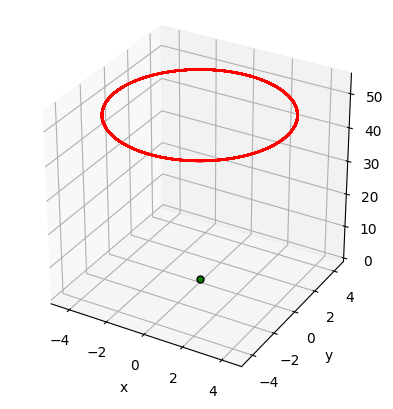

In [28]:
# Plotando alguns resultados
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

def equal_axes(x_t,y_t,z_t):
    # Create cubic bounding box to simulate equal aspect ratio
    max_range = np.array([x_t.max()-x_t.min(), y_t.max()-y_t.min(), z_t.max()-z_t.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(x_t.max()+x_t.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(y_t.max()+y_t.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(z_t.max()+z_t.min())
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'r')

equal_axes(x_t,y_t,z_t)
ax.axes.set_zlim3d(bottom=0,top=1.1*z_t.max())
ax.axes.set_ylim3d(bottom=1.1*y_t.min(),top=1.1*y_t.max())
ax.axes.set_xlim3d(left=1.1*x_t.min(),right=1.1*x_t.max())
ax.plot(x_t, y_t, z_t, 'r')
ax.plot(0, 0, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="green")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

##### **9. Mostre as trajetórias geradas e a animação do movimento do pião. Simule ao menos um tempo de 10 segundos e tome cuidados com a escolha do número de amostras e o passo de integração usado.**

- **Esta etapa do trabalho fora realizada em MATLAB, visto que as interfaces gráficas são melhores.**

In [29]:
# Salvando os dados
mdic = {"option":option, "l": l, "t":t, "x_t": x_t, "y_t": y_t, "z_t": z_t, "theta_t": theta_t, "psi_t": psi_t, "phi_t": phi_t, "theta_d_t": theta_d_t, "psi_d_t": psi_d_t, "phi_d_t": phi_d_t}
mdic

{'option': 'Piao Classico v1',
 'l': 0.05,
 't': array([0.000e+00, 5.000e-03, 1.000e-02, ..., 9.990e+00, 9.995e+00,
        1.000e+01]),
 'x_t': array([ 0.        ,  0.9506218 ,  1.85545557, ..., -1.95540974,
        -1.05887659, -0.1113528 ]),
 'y_t': array([4.35778714, 4.25283778, 3.94304477, ..., 3.8944438 , 4.22718563,
        4.35636541]),
 'z_t': array([49.8097349 , 49.80973488, 49.80973482, ..., 49.80973479,
        49.80973481, 49.8097348 ]),
 'theta_t': array([0.08726646, 0.08726647, 0.08726648, ..., 0.08726649, 0.08726648,
        0.08726649]),
 'psi_t': array([0.00000000e+00, 1.01138939e-08, 7.00456084e-08, ...,
        5.57271628e-04, 5.57387028e-04, 5.57498123e-04]),
 'phi_t': array([0.00000000e+00, 2.19911469e-01, 4.39822877e-01, ...,
        4.39357643e+02, 4.39577530e+02, 4.39797416e+02]),
 'theta_d_t': array([ 0.00000000e+00,  2.05990377e-06,  3.73788309e-06, ...,
        -1.42994102e-06, -1.77107649e-07,  1.10873362e-06]),
 'psi_d_t': array([0.00000000e+00, 5.25521258

In [30]:
savemat("dataPiao.mat", mdic)